![Two data scientists working on a dashboard.](hr-image-small.png)

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column                   | Description                                                                      |
|------------------------- |--------------------------------------------------------------------------------- |
| `student_id`             | A unique ID for each student.                                                    |
| `city`                   | A code for the city the student lives in.                                        |
| `city_development_index` | A scaled development index for the city.                                         |
| `gender`                 | The student's gender.                                                            |
| `relevant_experience`    | An indicator of the student's work relevant experience.                          |
| `enrolled_university`    | The type of university course enrolled in (if any).                              |
| `education_level`        | The student's education level.                                                   |
| `major_discipline`       | The educational discipline of the student.                                       |
| `experience`             | The student's total work experience (in years).                                  |
| `company_size`           | The number of employees at the student's current employer.                       |
| `company_type`           | The type of company employing the student.                                       |
| `last_new_job`           | The number of years between the student's current and previous jobs.             |
| `training_hours`         | The number of hours of training completed.                                       |
| `job_change`             | An indicator of whether the student is looking for a new job (`1`) or not (`0`). |

In [497]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
ds_jobs = pd.read_csv("customer_train.csv")

# View the dataset
ds_jobs.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [498]:
# Create a copy of ds_jobs for transforming
ds_jobs_transformed = ds_jobs.copy()

# Start coding here. Use as many cells as you like!

## The Head Data Scientist at Training Data Ltd. has asked you to create a DataFrame called ds_jobs_transformed that stores the data in customer_train.csv much more efficiently.

In [499]:
ds_jobs_transformed.shape

(19158, 14)

In [500]:
ds_jobs_transformed.columns

Index(['student_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

In [501]:
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [502]:
ds_jobs_transformed.describe()

,student_id,city_development_index,training_hours,job_change
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## Columns containing categories with only two factors must be stored as Booleans (bool).

##### Converting the job_change column to bool data type

In [503]:
ds_jobs_transformed['job_change'] = ds_jobs_transformed['job_change'].astype('bool')

##### Converting the relevant_experience column to bool data type

In [504]:
map_dict = {"Has relevant experience": True, "No relevant experience":False}
ds_jobs_transformed['relevant_experience'] = ds_jobs_transformed['relevant_experience'].map(map_dict)

## Columns containing integers only must be stored as 32-bit integers (int32).

##### Converting the student_id column to int32 data type

In [505]:
ds_jobs_transformed['student_id'] = ds_jobs_transformed['student_id'].astype('int32')

##### Converting the training_hours column to int32 data type

In [506]:
ds_jobs_transformed['training_hours'] = ds_jobs_transformed['training_hours'].astype('int32')

## Columns containing floats must be stored as 16-bit floats (float16).

##### Converting the city_development_index column to float16 data type

In [507]:
ds_jobs_transformed['city_development_index'] = ds_jobs_transformed['city_development_index'].astype('float16')

## Columns containing nominal categorical data must be stored as the category data type.

##### Converting the city column to nominal category data type

In [508]:
ds_jobs_transformed['city'] = ds_jobs_transformed['city'].astype('category')

##### Converting the gender column to nominal category data type

In [509]:
ds_jobs_transformed['gender'] = ds_jobs_transformed['gender'].astype('category')

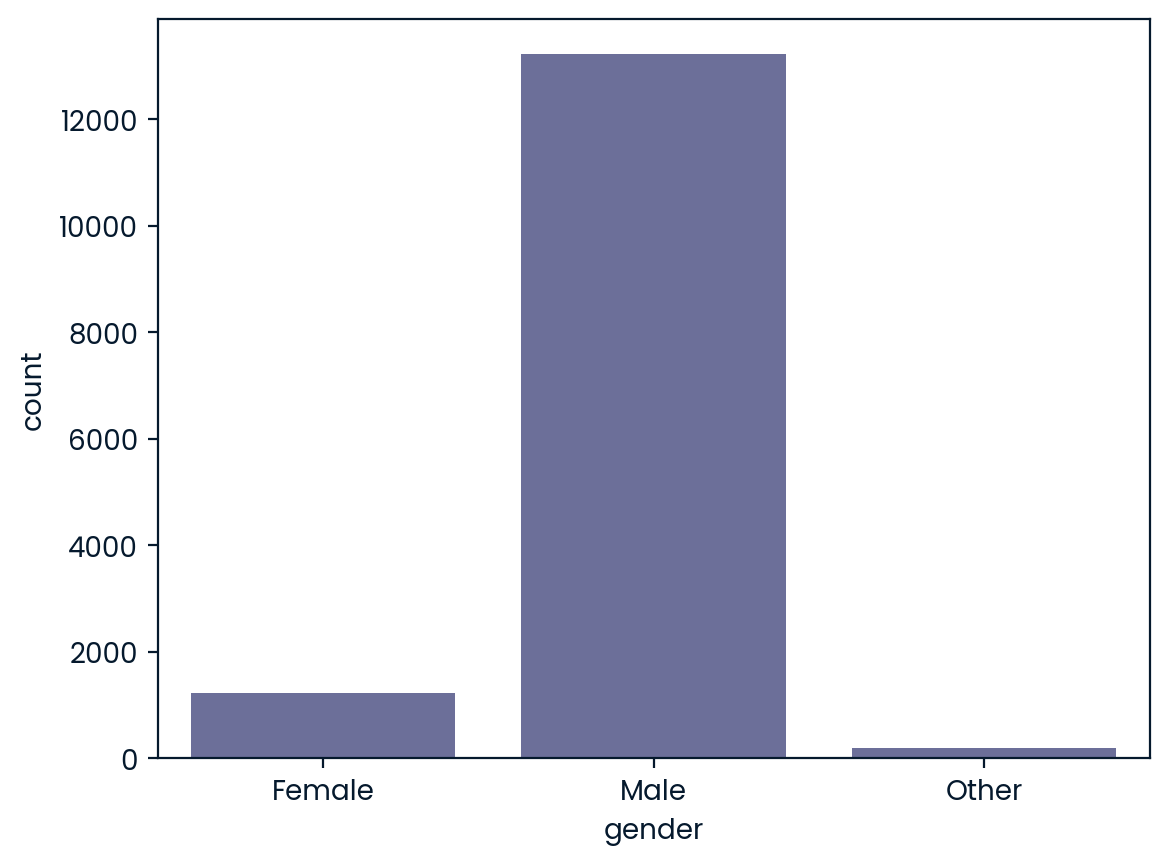

In [510]:
sns.countplot(data=ds_jobs_transformed, x='gender')
plt.show()

##### Converting the major_discipline column to nominal category data type

In [511]:
ds_jobs_transformed['major_discipline'] = ds_jobs_transformed['major_discipline'].astype('category')

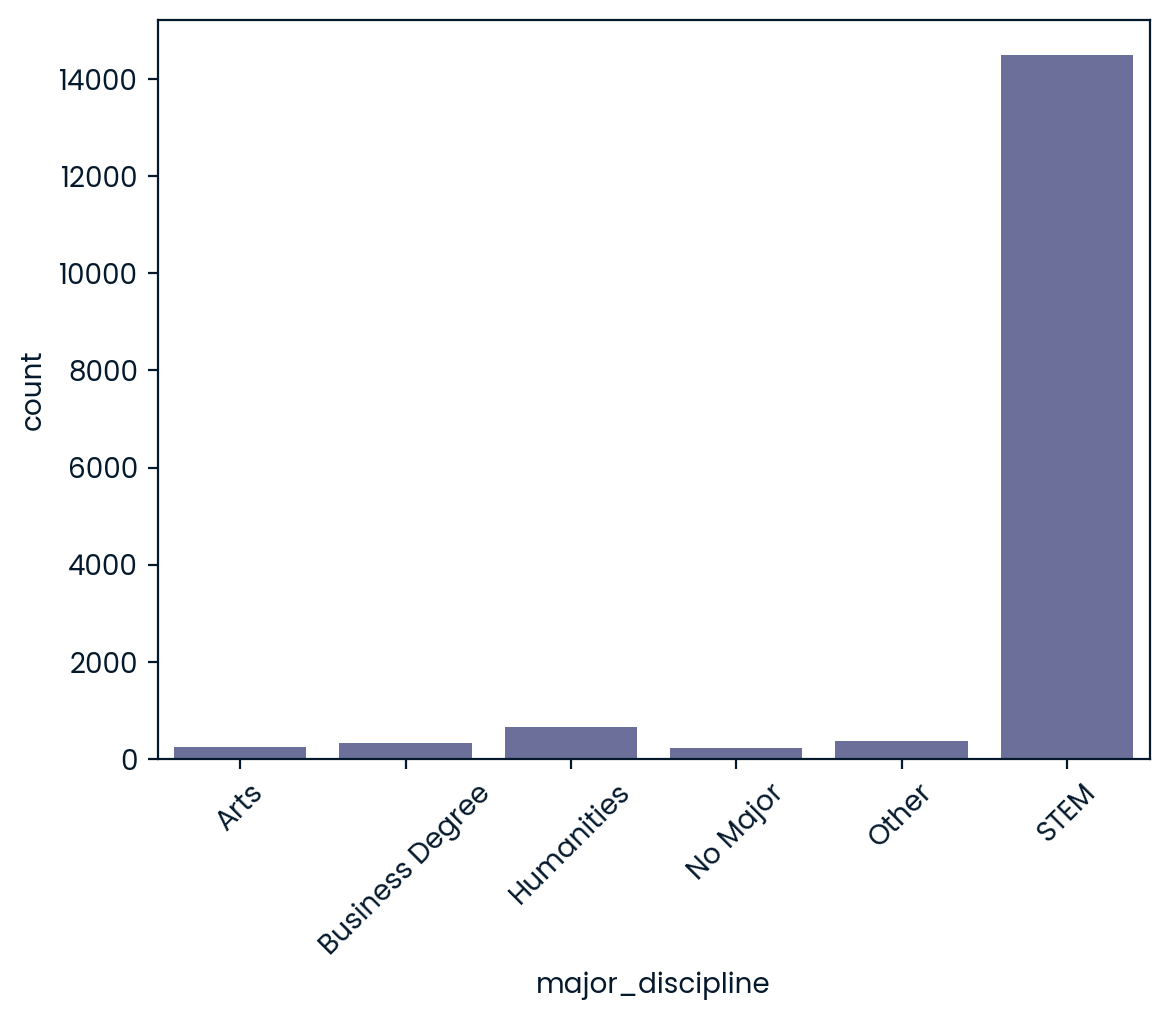

In [512]:
sns.countplot(data=ds_jobs_transformed, x='major_discipline')
plt.xticks(rotation=45)
plt.show()

##### Converting the company_type column to nominal category data type

In [513]:
ds_jobs_transformed['company_type'] = ds_jobs_transformed['company_type'].astype('category')

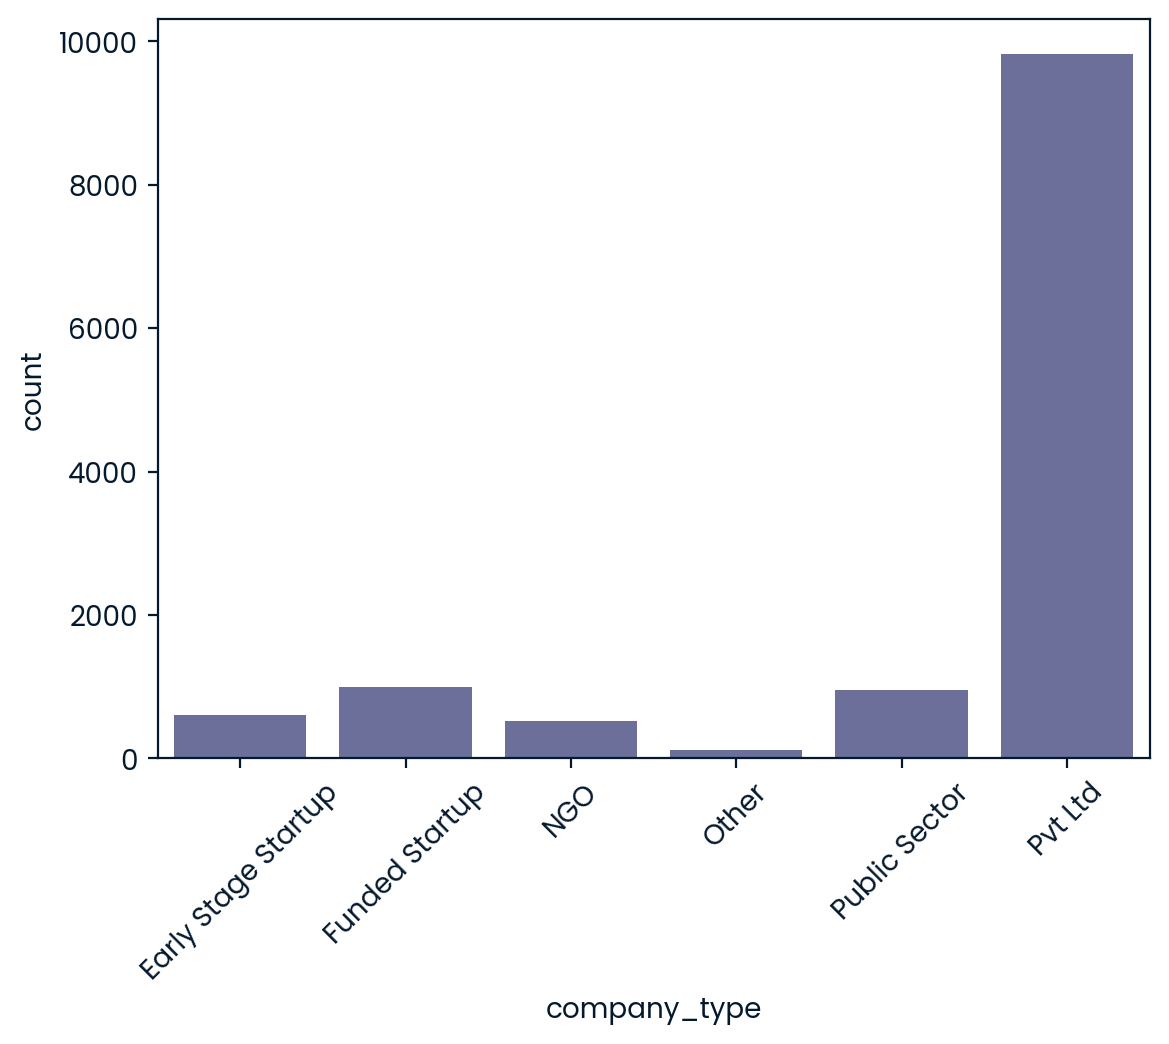

In [514]:
sns.countplot(data=ds_jobs_transformed, x='company_type')
plt.xticks(rotation=45)
plt.show()

## Columns containing ordinal categorical data must be stored as ordered categories, and not mapped to numerical values, with an order that reflects the natural order of the column.

##### Converting the experience column to ordinal category data type

In [515]:
ds_jobs_transformed['experience'].nunique()

22

In [516]:
ds_jobs_transformed['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [517]:
category = pd.CategoricalDtype(['<1'] + list(map(str, range(1, 21))) + ['>20'], ordered=True)
ds_jobs_transformed['experience'] = ds_jobs_transformed['experience'].astype(category)

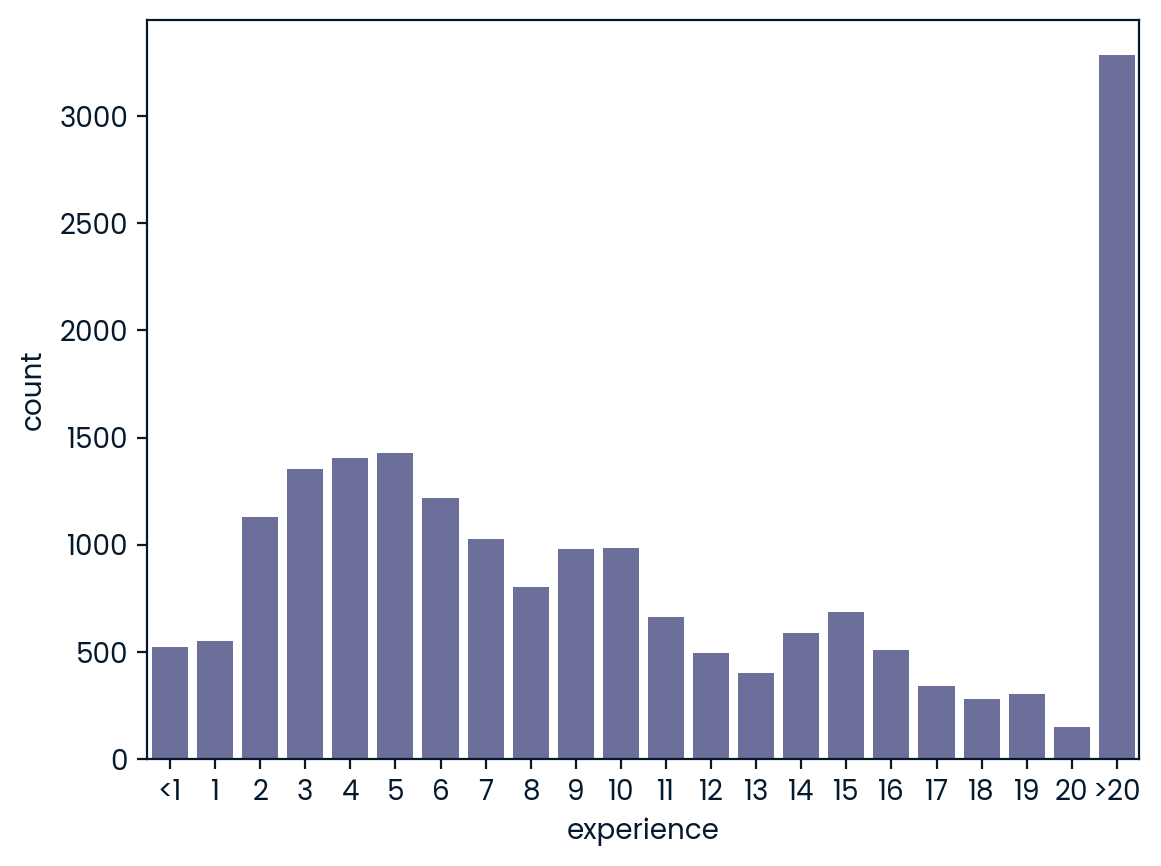

In [518]:
sns.countplot(data=ds_jobs_transformed, x='experience')
plt.show()

##### Converting the education_level column to ordered category data type

In [519]:
ds_jobs_transformed['education_level'].nunique()

5

In [520]:
ds_jobs_transformed['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [521]:
category = pd.CategoricalDtype(['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], ordered=True)
ds_jobs_transformed['education_level'] = ds_jobs_transformed['education_level'].astype(category)

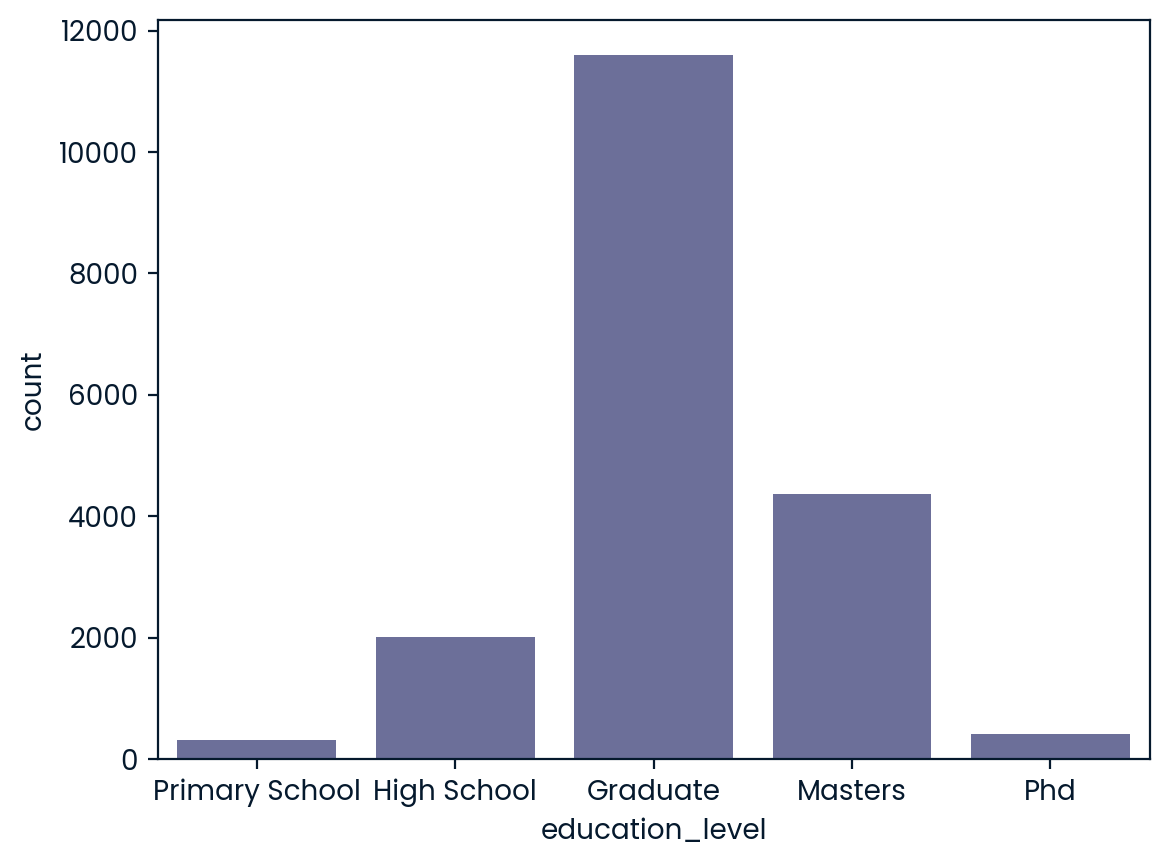

In [522]:
sns.countplot(data=ds_jobs_transformed, x='education_level')
plt.show()

##### Converting the enrolled_university column to ordered category data type

In [523]:
ds_jobs_transformed['enrolled_university'].nunique()

3

In [524]:
ds_jobs_transformed['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [525]:
category = pd.CategoricalDtype(['no_enrollment', 'Part time course', 'Full time course'], ordered=True)
ds_jobs_transformed['enrolled_university'] = ds_jobs_transformed['enrolled_university'].astype(category)

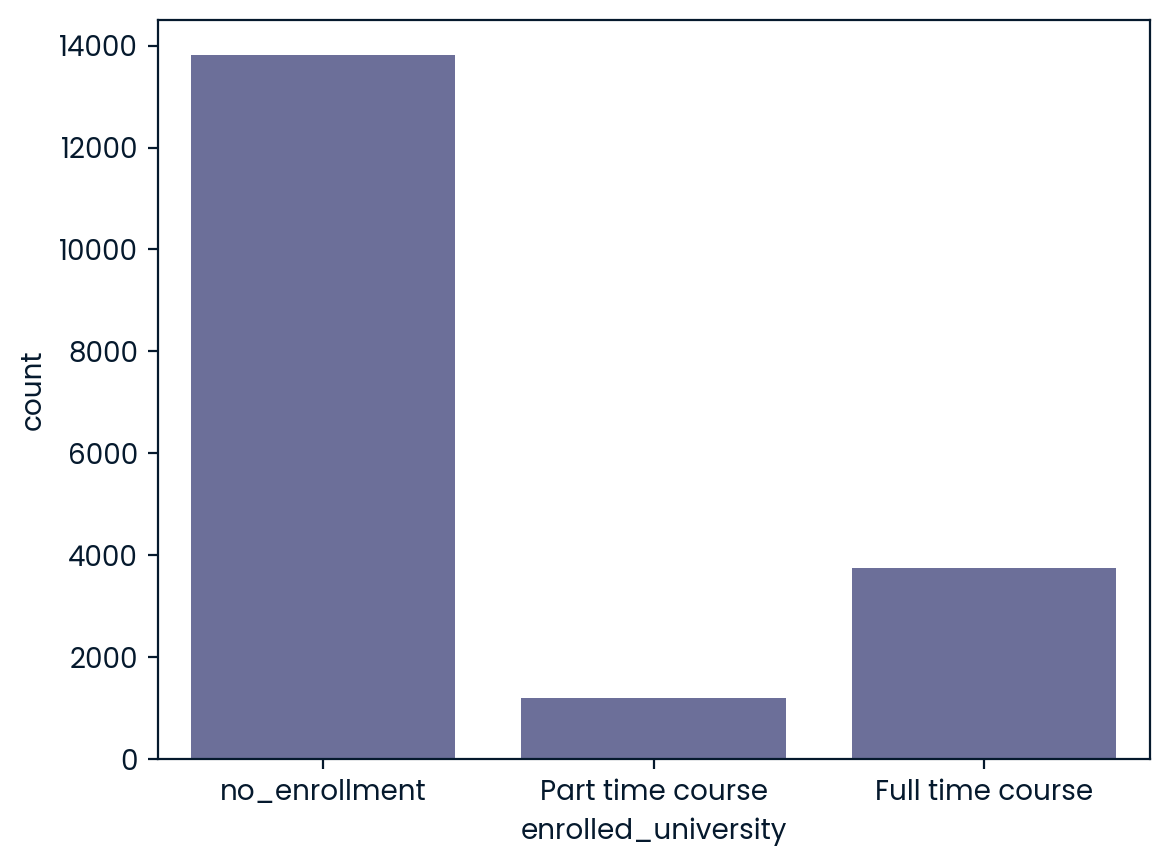

In [526]:
sns.countplot(data=ds_jobs_transformed, x='enrolled_university')
plt.show()

##### Converting the experience column to ordinal category data type

In [527]:
ds_jobs_transformed['company_size'].nunique()

8

In [528]:
ds_jobs_transformed['company_size'].value_counts()

50-99        3083
100-499      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [529]:
category = pd.CategoricalDtype(['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'], ordered=True)
ds_jobs_transformed['company_size'] = ds_jobs_transformed['company_size'].astype(category)

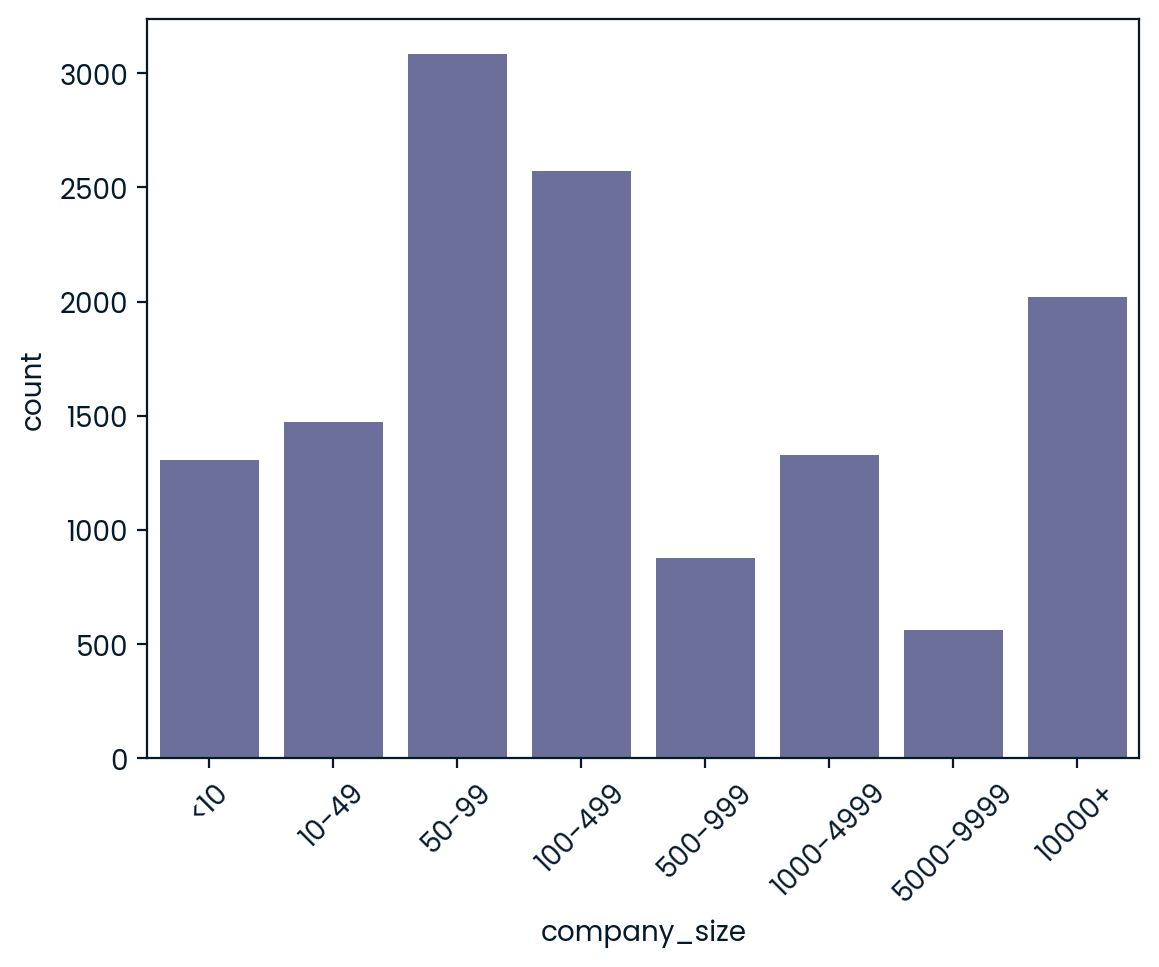

In [530]:
sns.countplot(data=ds_jobs_transformed, x='company_size')
plt.xticks(rotation = 45)
plt.show()

##### Converting the last_new_job column to ordinal category data type

In [531]:
ds_jobs_transformed['last_new_job'].nunique()

6

In [532]:
ds_jobs_transformed['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [533]:
category = pd.CategoricalDtype(['never', '1', '2', '3', '4', '>4'], ordered=True)
ds_jobs_transformed['last_new_job'] = ds_jobs_transformed['last_new_job'].astype(category)

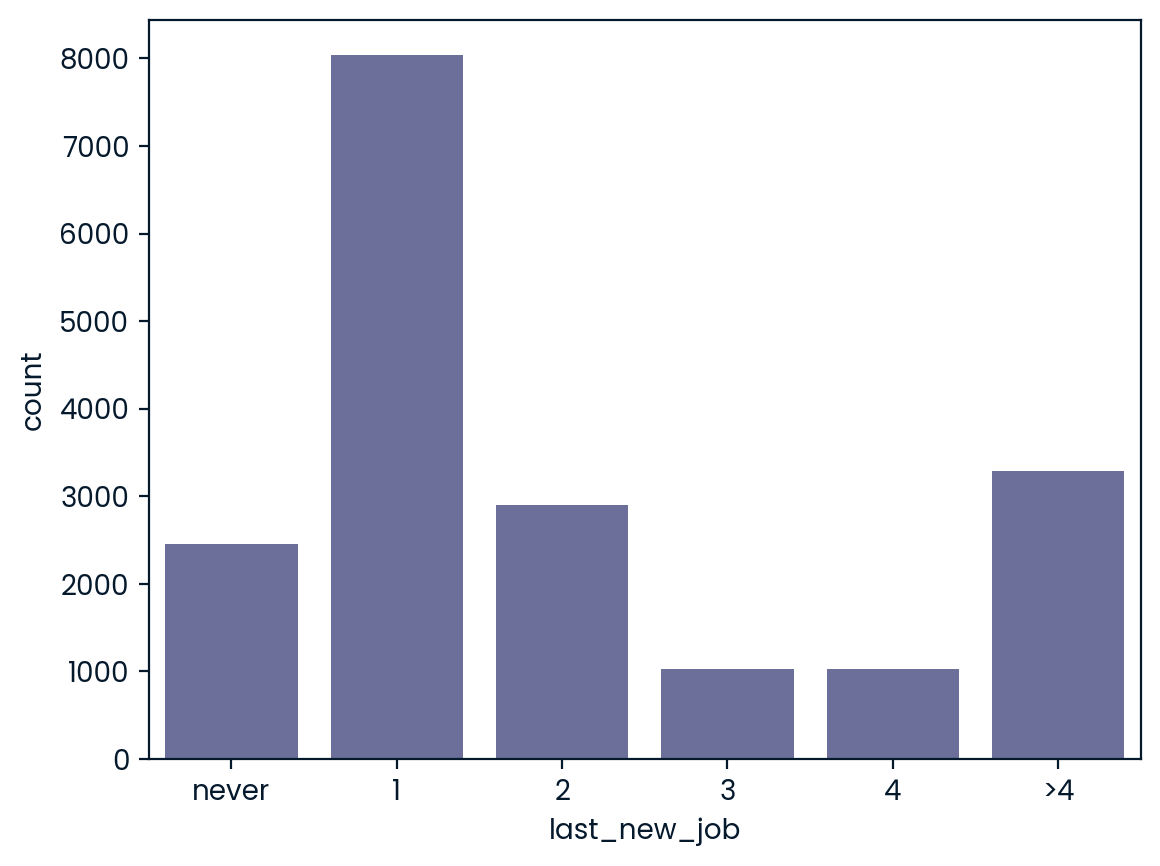

In [534]:
sns.countplot(data=ds_jobs_transformed, x='last_new_job')
plt.show()

## The DataFrame should be filtered to only contain students with 10 or more years of experience at companies with at least 1000 employees, as their recruiter base is suited to more experienced professionals at enterprise companies.

In [535]:
ds_jobs_transformed = ds_jobs_transformed.loc[(ds_jobs_transformed['experience'] >= '10') & (ds_jobs_transformed['company_size'] > '500-999')]

In [536]:
ds_jobs_transformed.head()

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
9,699,city_103,0.919922,NaN,True,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,False
12,25619,city_61,0.913086,Male,True,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,False
31,22293,city_103,0.919922,Male,True,Part time course,Graduate,STEM,19,5000-9999,Pvt Ltd,>4,141,False
34,26494,city_16,0.910156,Male,True,no_enrollment,Graduate,Business Degree,12,5000-9999,Pvt Ltd,3,145,False
40,2547,city_114,0.925781,Female,True,Full time course,Masters,STEM,16,1000-4999,Public Sector,2,14,False


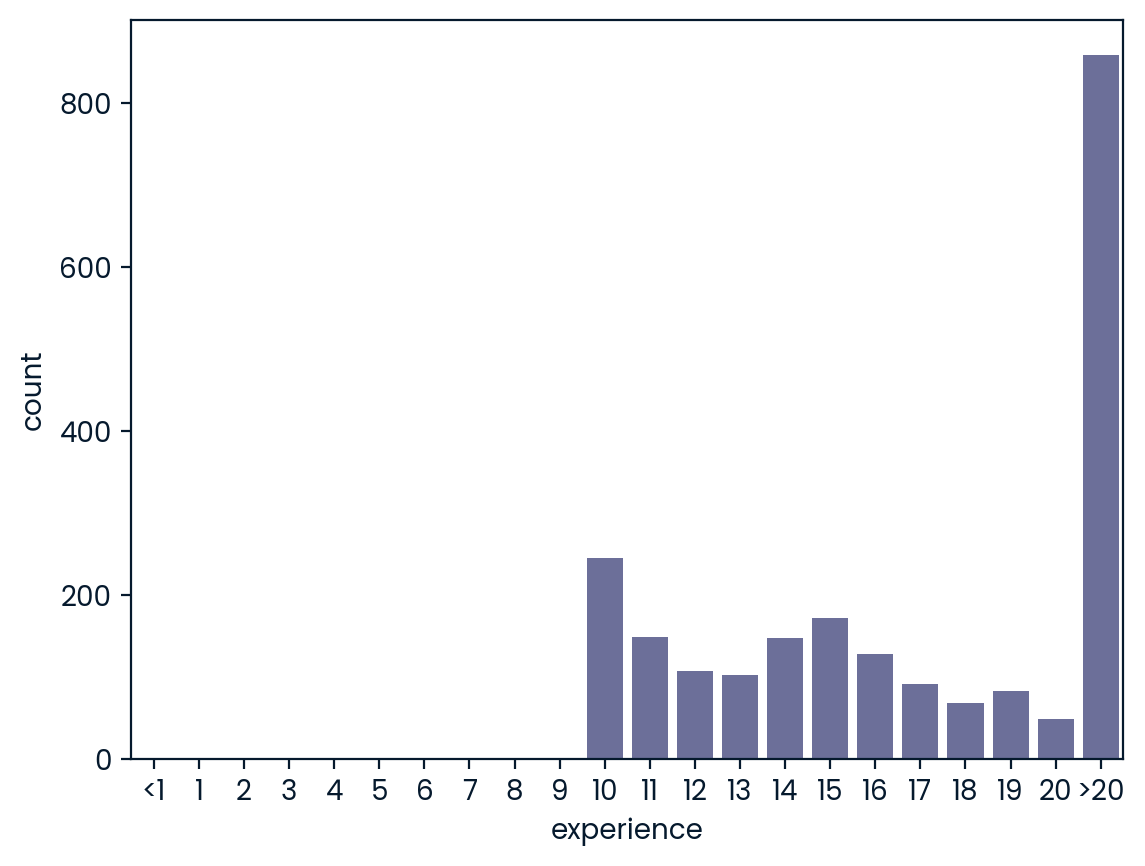

In [537]:
sns.countplot(data=ds_jobs_transformed, x='experience')
plt.show()

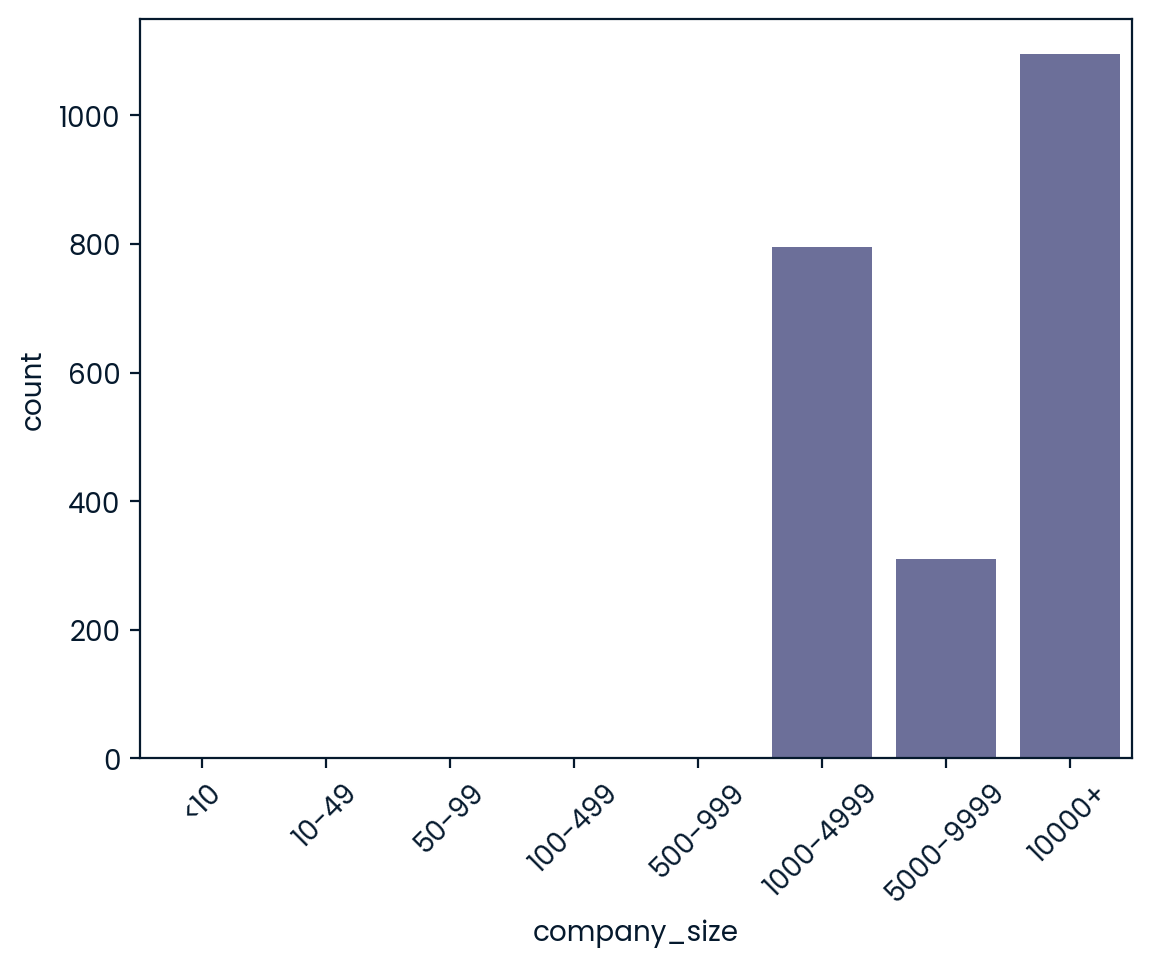

In [538]:
sns.countplot(data=ds_jobs_transformed, x='company_size')
plt.xticks(rotation = 45)
plt.show()

In [539]:
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 9 to 19143
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              2201 non-null   int32   
 1   city                    2201 non-null   category
 2   city_development_index  2201 non-null   float16 
 3   gender                  1821 non-null   category
 4   relevant_experience     2201 non-null   bool    
 5   enrolled_university     2185 non-null   category
 6   education_level         2184 non-null   category
 7   major_discipline        2097 non-null   category
 8   experience              2201 non-null   category
 9   company_size            2201 non-null   category
 10  company_type            2144 non-null   category
 11  last_new_job            2184 non-null   category
 12  training_hours          2201 non-null   int32   
 13  job_change              2201 non-null   bool    
dtypes: bool(2), category(9)

#### The initial memory usage of the dataframe was 2.0+MB.
#### After the data preparation process for modelling, the final memory usage stands at 69.5KB.
#### This represents atleast a 96.5% decrease in memory usage!!!!